In [ ]:
# Let's use the second-order polynomial function to build an approximation function for the Boston dataset


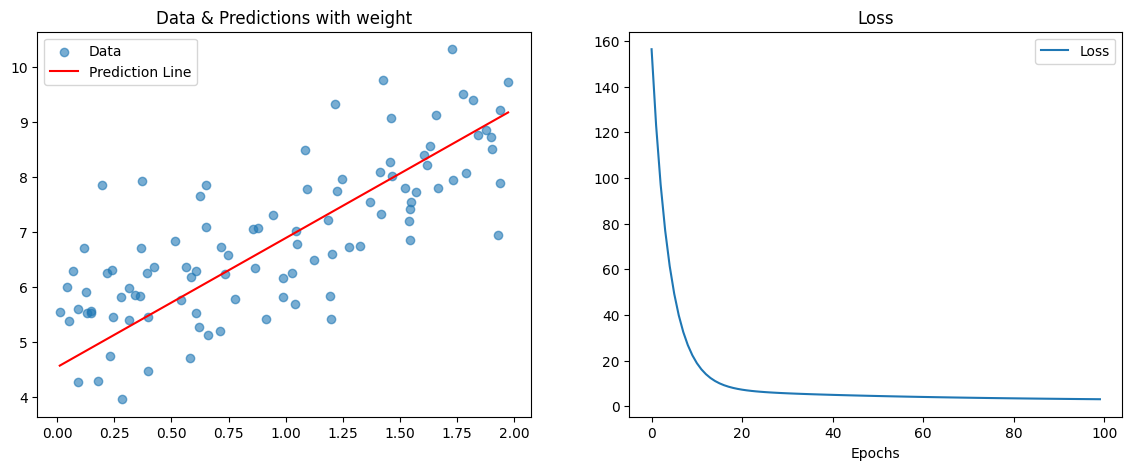

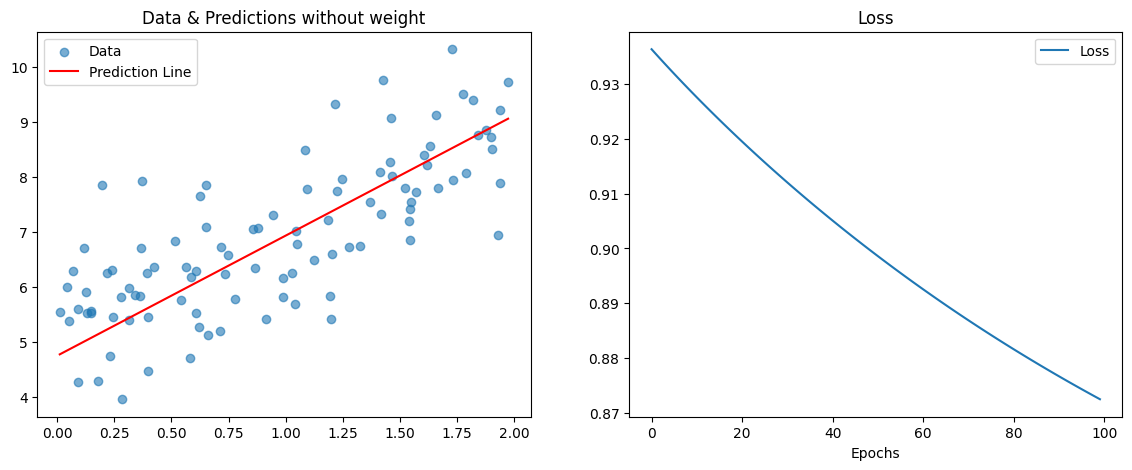

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 2 * X + 5 + np.random.randn(100, 1)

xdata = torch.tensor(X, dtype=torch.float32)
ydata = torch.tensor(y, dtype=torch.float32)

weight = torch.ones(100)
weight[:50] = 5

class LRM(torch.nn.Module):
    def __init__(self):
        super(LRM, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)
our_model = LRM()
optimizer = torch.optim.SGD(our_model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss(reduction='none')
ypreds = []
losses = []

for i in range(100):
    y_pred = our_model(xdata)
    ypreds.append(y_pred.detach())

    loss_unweight = criterion(y_pred, ydata)
    loss_func = (loss_unweight.squeeze() * weight).mean()

    optimizer.zero_grad()
    loss_func.backward()
    optimizer.step()

    losses.append(loss_func.item())

sorted_indices = X.squeeze().argsort()
X_sorted = xdata[sorted_indices]
y_pred_sorted = ypreds[-1][sorted_indices]
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Data & Predictions with weight")
plt.scatter(xdata.numpy(), ydata.numpy(), label="Data", alpha=0.6)
plt.plot(X_sorted.numpy(), y_pred_sorted.numpy(), color='red', label="Prediction Line")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Loss")
plt.plot(losses, label="Loss")
plt.xlabel("Epochs")
plt.legend()

plt.show()
# wothout weight
loss_without_weight = torch.nn.MSELoss()
losses_no_weight=[]
ypreds_no_weight =[]
for i in range(100):
    y_pred = our_model(xdata)
    ypreds_no_weight.append(y_pred.detach())
    loss_noweight = loss_without_weight(y_pred, ydata)
    optimizer.zero_grad()
    loss_noweight.backward()
    optimizer.step()
    losses_no_weight.append(loss_noweight.item())

sorted_indices_no_weight = X.squeeze().argsort()
X_sorted_no_weight = xdata[sorted_indices_no_weight]
y_pred_sorted_no_weight = ypreds_no_weight[-1][sorted_indices_no_weight]
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Data & Predictions without weight")
plt.scatter(xdata.numpy(), ydata.numpy(), label="Data", alpha=0.6)
plt.plot(X_sorted_no_weight.numpy(), y_pred_sorted_no_weight.numpy(), color='red', label="Prediction Line")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Loss")
plt.plot(losses_no_weight, label="Loss")
plt.xlabel("Epochs")
plt.legend()

plt.show()


In [ ]:
# Linear Regression với dữ liệu thiếu

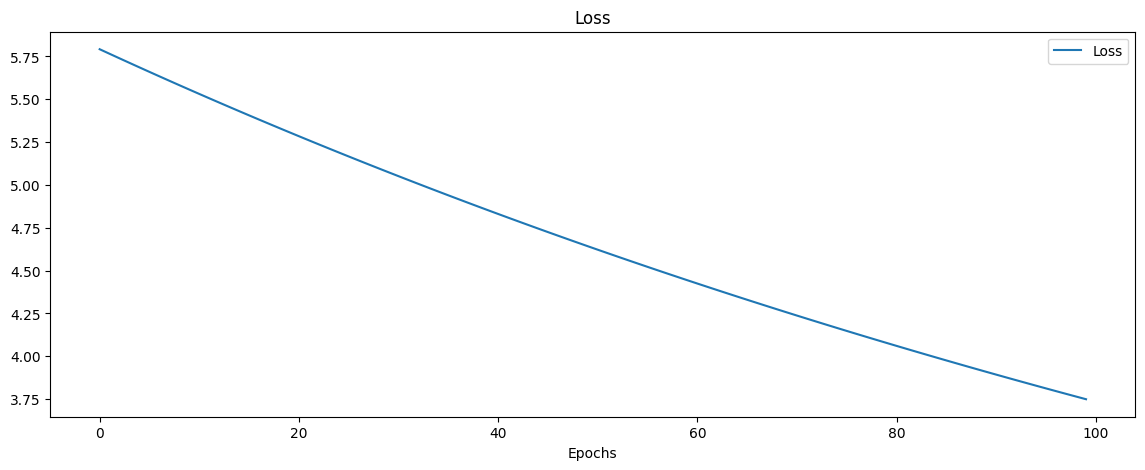

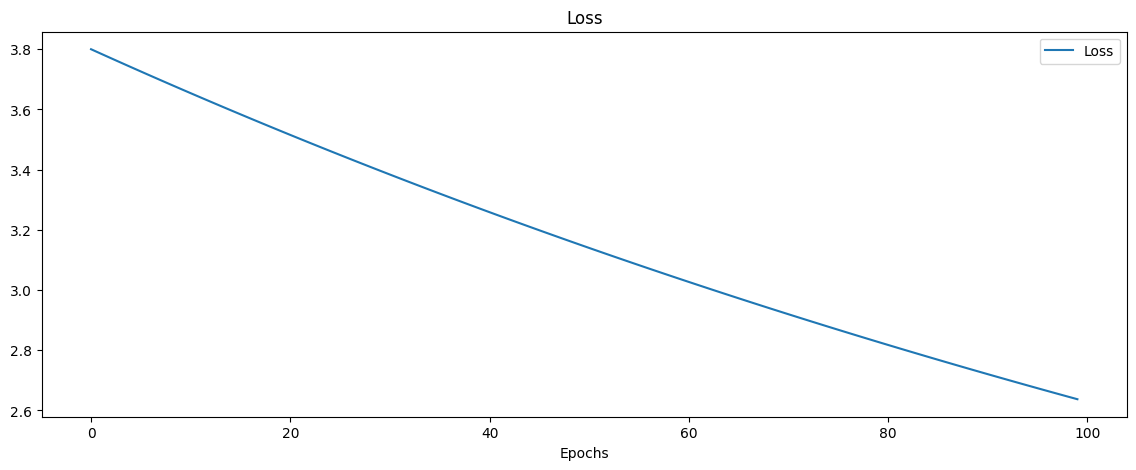

In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
data = fetch_california_housing()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
xdata = torch.tensor(X_scaled, dtype=torch.float32)
ydata = torch.tensor(y, dtype=torch.float32).view(-1, 1)
class LRM(torch.nn.Module):
    def __init__(self):
        super(LRM, self).__init__()
        self.linear = torch.nn.Linear(8, 1)
        torch.nn.init.xavier_uniform_(self.linear.weight)
    def forward(self, x):
        return self.linear(x)

our_model = LRM()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(our_model.parameters(), lr=0.001)
losses = []
for i in range(100):
    y_pred = our_model(xdata)
    lossh = loss_fn(y_pred, ydata)

    optimizer.zero_grad()
    lossh.backward()
    optimizer.step()

    losses.append(lossh.item())

plt.figure(figsize=(14, 5))
plt.title("Loss")
plt.plot(losses, label="Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()
# insufficient data
np.random.seed(42)
missing_mask = np.random.rand(*X.shape) < 0.1
X[missing_mask] = np.nan
imputer = SimpleImputer (strategy = "mean")
X_filled = imputer.fit_transform (X)
X_scaled = scaler.fit_transform(X_filled)
xdata = torch.tensor(X_scaled, dtype=torch.float32)
ydata = torch.tensor(y, dtype=torch.float32).view(-1, 1)
losses_insu = []
for i in range(100):
    y_pred = our_model(xdata)
    lossh = loss_fn(y_pred, ydata)

    optimizer.zero_grad()
    lossh.backward()
    optimizer.step()

    losses_insu.append(lossh.item())

plt.figure(figsize=(14, 5))
plt.title("Loss with insufficient data")
plt.plot(losses_insu, label="Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
# Online Linear Regression

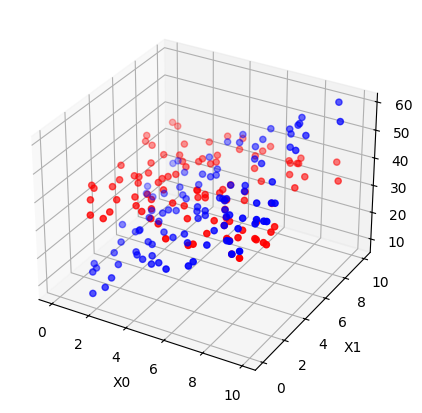

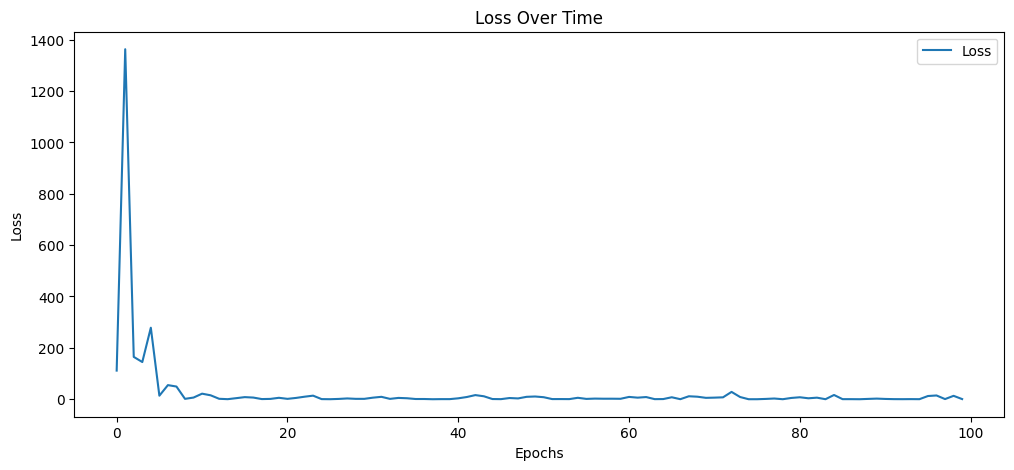

In [55]:
import torch
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def generate_streaming_data():
    while True:
        X_new = np.random.rand(1, 2) * 10
        y_new = 4 * X_new[:, 0] + 2 * X_new[:, 1] + 3 + np.random.randn(1)
        yield X_new, y_new

data = generate_streaming_data()
class LRM(torch.nn.Module):
    def __init__(self):
        super(LRM, self).__init__()
        self.linear = torch.nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

our_model = LRM()
optimizer = torch.optim.SGD(our_model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
X_values = []
y_values = []
ypreds = []
losses = []
for i in range(100):
    x, y = next(data)
    X_values.append(x[0])
    y_values.append(y[0])
    xdata = torch.tensor(x, dtype=torch.float32)
    ydata = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure correct shape
    y_pred = our_model(xdata)
    loss = criterion(y_pred, ydata)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ypreds.append(y_pred.item())
    losses.append(loss.item())


X_values = np.array(X_values)
y_values = np.array(y_values)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_values[:,0], X_values[:,1], y_values, c='b', marker='o')
ax.scatter(X_values[:,0], X_values[:,1], ypreds[-1], c='r', marker='o')
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('y')
plt.figure(figsize=(12, 5))
plt.plot(losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()

plt.show()
